In [127]:
# setup - import all relevant modules
%matplotlib inline
import os
import numpy as np
import pandas as pd
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt

In [96]:
# Read data and get basic shape information
ted_info = pd.read_csv("ted_main.csv")
colnames = ted_info.columns
nrows, ncols = ted_info.shape

## TED Columns

In [97]:
print(colnames)

Index(['comments', 'description', 'duration', 'event', 'film_date',
       'languages', 'main_speaker', 'name', 'num_speaker', 'published_date',
       'ratings', 'related_talks', 'speaker_occupation', 'tags', 'title',
       'url', 'views'],
      dtype='object')


### Reorder the columns

In [98]:
ted_info = ted_info[['name', 'title', 'description', 'main_speaker', 'num_speaker', 'speaker_occupation', 'event', 'film_date', 'published_date', 'duration', 'ratings', 'views', 'tags', 'comments', 'related_talks', 'url']]

In [99]:
ted_info['film_date'] = ted_info['film_date'].apply(lambda x: dt.datetime.fromtimestamp( int(x)).strftime('%d-%m-%Y'))
ted_info['published_date'] = ted_info['published_date'].apply(lambda x: dt.datetime.fromtimestamp( int(x)).strftime('%d-%m-%Y'))

In [100]:
ted_info.head()

,name,title,description,main_speaker,num_speaker,speaker_occupation,event,film_date,published_date,duration,ratings,views,tags,comments,related_talks,url
0,Ken Robinson: Do schools kill creativity?,Do schools kill creativity?,Sir Ken Robinson makes an entertaining and pro...,Ken Robinson,1,Author/educator,TED2006,24-02-2006,26-06-2006,1164,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...",47227110,"['children', 'creativity', 'culture', 'dance',...",4553,"[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/ken_robinson_says_sc...
1,Al Gore: Averting the climate crisis,Averting the climate crisis,With the same humor and humanity he exuded in ...,Al Gore,1,Climate advocate,TED2006,24-02-2006,26-06-2006,977,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...",3200520,"['alternative energy', 'cars', 'climate change...",265,"[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/al_gore_on_averting_...
2,David Pogue: Simplicity sells,Simplicity sells,New York Times columnist David Pogue takes aim...,David Pogue,1,Technology columnist,TED2006,23-02-2006,26-06-2006,1286,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...",1636292,"['computers', 'entertainment', 'interface desi...",124,"[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",https://www.ted.com/talks/david_pogue_says_sim...
3,Majora Carter: Greening the ghetto,Greening the ghetto,"In an emotionally charged talk, MacArthur-winn...",Majora Carter,1,Activist for environmental justice,TED2006,25-02-2006,26-06-2006,1116,"[{'id': 3, 'name': 'Courageous', 'count': 760}...",1697550,"['MacArthur grant', 'activism', 'business', 'c...",200,"[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",https://www.ted.com/talks/majora_carter_s_tale...
4,Hans Rosling: The best stats you've ever seen,The best stats you've ever seen,You've never seen data presented like this. Wi...,Hans Rosling,1,Global health expert; data visionary,TED2006,21-02-2006,27-06-2006,1190,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...",12005869,"['Africa', 'Asia', 'Google', 'demo', 'economic...",593,"[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",https://www.ted.com/talks/hans_rosling_shows_t...


## Most Viewed Talks of All Time

In [116]:
pop_talks = ted_info.sort_values(by=['views'], ascending=False)[:15]
pop_talks.iloc[0:6,0:4]

,name,title,description,main_speaker
0,Ken Robinson: Do schools kill creativity?,Do schools kill creativity?,Sir Ken Robinson makes an entertaining and pro...,Ken Robinson
1346,Amy Cuddy: Your body language may shape who yo...,Your body language may shape who you are,"Body language affects how others see us, but i...",Amy Cuddy
677,Simon Sinek: How great leaders inspire action,How great leaders inspire action,Simon Sinek has a simple but powerful model fo...,Simon Sinek
837,Brené Brown: The power of vulnerability,The power of vulnerability,Brené Brown studies human connection -- our ab...,Brené Brown
452,Mary Roach: 10 things you didn't know about or...,10 things you didn't know about orgasm,"""Bonk"" author Mary Roach delves into obscure s...",Mary Roach
1776,Julian Treasure: How to speak so that people w...,How to speak so that people want to listen,"Have you ever felt like you're talking, but no...",Julian Treasure


In [150]:
fullnames = pop_talks['main_speaker'].apply(lambda x: x.partition(' '))
pop_talks['speaker_first_name'] = fullnames.apply(lambda x: x[0])

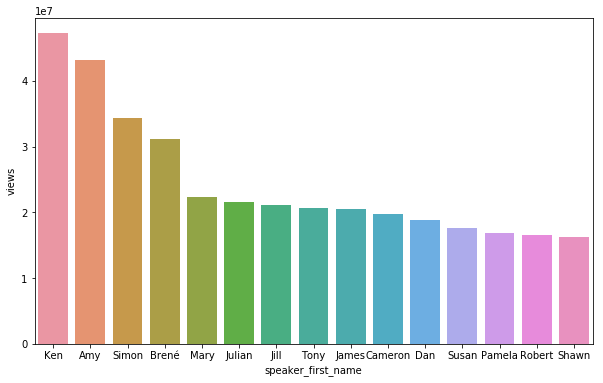

In [151]:
plt.figure(figsize=(10,6))
sns.barplot(x='speaker_first_name', y='views', data=pop_talks)

'Ken'